# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
study_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(study_data_df["Mouse ID"].unique())

mouse_count



249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


study_data_df["Concatenate"] = study_data_df['Mouse ID'] + study_data_df['Timepoint'].astype(str)
study_data_df["Duplicated"] = study_data_df.duplicated(subset=['Concatenate'], keep=False)

duplicated_df = pd.DataFrame(study_data_df.loc[study_data_df["Duplicated"]==True])

dupe_mouse = duplicated_df["Mouse ID"].unique()

dupe_mouse




array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# this was completed as part of the previous block of code
duplicated_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Concatenate,Duplicated
908,g989,Propriva,Female,21,26,0,45.000000,0,g9890,True
909,g989,Propriva,Female,21,26,0,45.000000,0,g9890,True
910,g989,Propriva,Female,21,26,5,48.786801,0,g9895,True
911,g989,Propriva,Female,21,26,5,47.570392,0,g9895,True
912,g989,Propriva,Female,21,26,10,51.745156,0,g98910,True
913,g989,Propriva,Female,21,26,10,49.880528,0,g98910,True
914,g989,Propriva,Female,21,26,15,51.325852,1,g98915,True
915,g989,Propriva,Female,21,26,15,53.442020,0,g98915,True
916,g989,Propriva,Female,21,26,20,55.326122,1,g98920,True
917,g989,Propriva,Female,21,26,20,54.657650,1,g98920,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_df.drop(study_data_df[study_data_df['Mouse ID'] == "g989"].index, inplace=True)

study_data_df.head()





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Concatenate,Duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320,False


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = len(study_data_df["Mouse ID"].unique())
new_mouse_count


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_data = study_data_df.set_index("Drug Regimen")
drug_data = drug_data.groupby(["Drug Regimen"])

tumor = drug_data["Tumor Volume (mm3)"]

means = tumor.mean()
medians = tumor.median()
variances = tumor.var()
stdevs = tumor.std()
sems = tumor.sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean": means,
                          "Median": medians,
                          "Variance": variances,
                          "Std Dev": stdevs,
                          "SEM": sems})
summary_df





,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_adv = tumor.agg(['mean', 'median', 'var', 'std', 'sem'])

summary_adv
                      
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

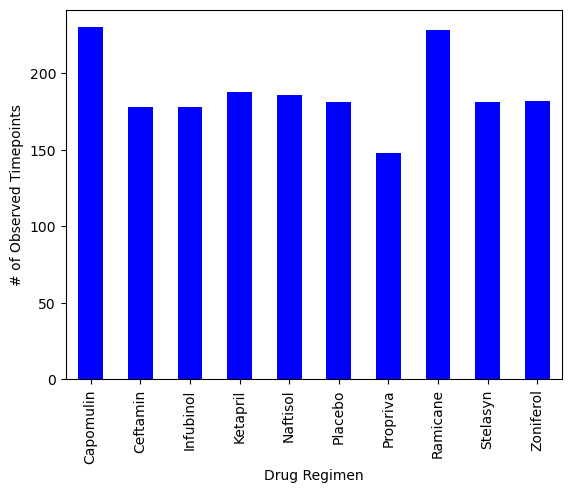

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#get a count of rows per drug from our grouped dataframe
count_drug_data = drug_data['Timepoint'].count()

#create plot and labels (Drug Regimen, # of Observed Timepoints)
count_chart = count_drug_data.plot(kind='bar', color='blue')
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("# of Observed Timepoints")

plt.show()
plt.tight_layout()





                  

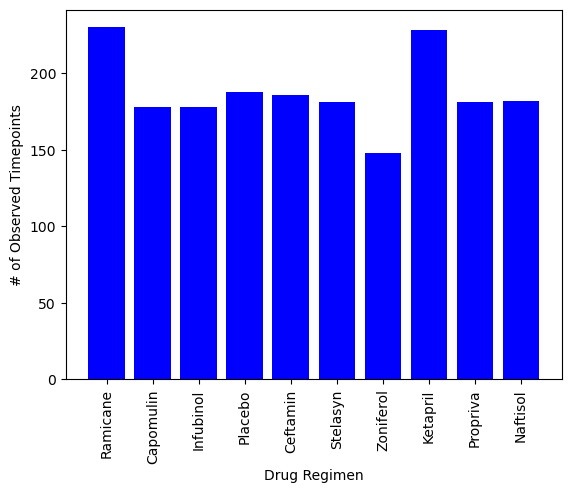

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# matplotlib- plt.bar, use previously defined count of Timepoints (count_drug_data)
x_axis = study_data_df["Drug Regimen"].unique()

plt.bar(x_axis, count_drug_data, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")
plt.show()
plt.tight_layout()





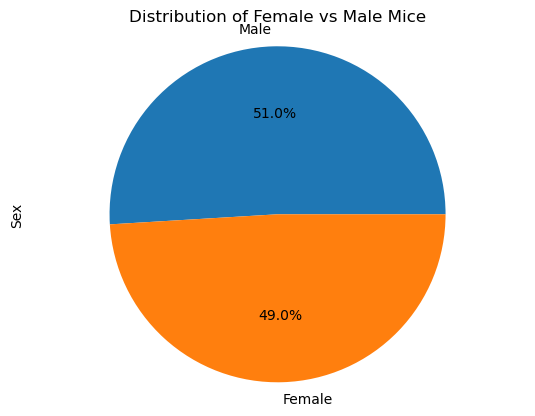

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#define variable to graph
sex = study_data_df["Sex"].value_counts()

#create chart with labels, title, and y-lable, and 'print'
piechart = sex.plot(kind="pie", y='Sex', title="Distribution of Female vs Male Mice", autopct='%1.1f%%')
piechart.set_ylabel("Sex")
plt.axis("equal")
plt.show()


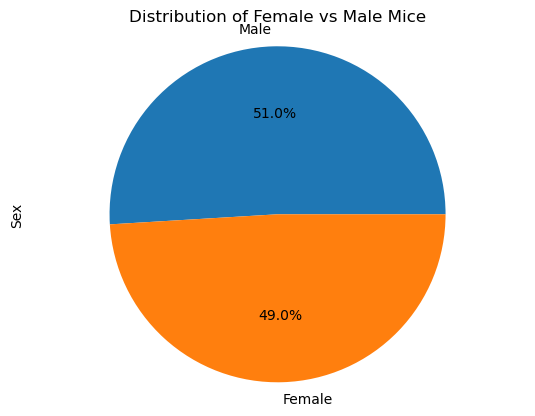

<function matplotlib.pyplot.show(close=None, block=None)>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#use already defined "sex" dataframe count, create plot with %
labels = study_data_df["Sex"].unique()
plt.pie(sex, labels=labels, autopct="%1.1f%%")

#add titles and 'y' label
plt.ylabel("Sex")
plt.title("Distribution of Female vs Male Mice")
plt.axis("equal")

#get rid of the <function matplotlib.pyplot.show(close=None, block=None)> message on top of the graph
plt.show(block=False)
plt.show


## Quartiles, Outliers and Boxplots

In [102]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# these next 4 lines are working to pull the correct max values, list length = 248
mouse_df = study_data_df.groupby(["Mouse ID"])
time_point = mouse_df["Timepoint"]
mouse_list = mouse_df["Mouse ID"]
max_time = [time_point.max()]

max_time_df = pd.DataFrame(max_time)
max_time_df = max_time_df.transpose()
max_time_df.head()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatment_df = pd.merge(study_data_df, max_time_df, on = "Mouse ID")

# rename the duplicated column names (timepoint is in both) to avoid confusion
treatment_df = treatment_df.rename(columns={"Timepoint_x":"Timepoint", "Timepoint_y":"Max Timepoint"})




# clean up!
#drop unnecessary columns (concat and dup) that were used earlier
treatment_df = treatment_df.drop('Concatenate', axis=1)
treatment_df = treatment_df.drop('Duplicated', axis=1)

#filter for timepoint = max timepoint
filt_treatment_df = treatment_df.loc[treatment_df["Timepoint"] == treatment_df["Max Timepoint"], :]



 

#filter for drugs wanted

top_drug_df = filt_treatment_df.loc[(filt_treatment_df["Drug Regimen"] == "Capomulin") | 
                                 (filt_treatment_df["Drug Regimen"] == "Ramicane") |
                                 (filt_treatment_df["Drug Regimen"] == "Infubinol") |
                                 (filt_treatment_df["Drug Regimen"] == "Ceftamin"), :]




top_drug_df = top_drug_df.sort_values(by='Drug Regimen', ascending=True)


In [104]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Put treatments into a list for for loop (and later for plot labels)

drug_name = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol =[]

# for loop to find tumor volume lists for each drug
for drug in drug_name:
    tumor_vol.append(top_drug_df.loc[top_drug_df["Drug Regimen"]==drug, ["Tumor Volume (mm3)"]])



#find upper and lower bounds for each drug using the tumor_vol list

lowers = []
uppers = []

quartiles = tumor_vol[0]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
lowers.append(lower_bound)
uppers.append(upper_bound)

quartiles = tumor_vol[1]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
lowers.append(lower_bound)
uppers.append(upper_bound)

quartiles = tumor_vol[2]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
lowers.append(lower_bound)
uppers.append(upper_bound)

quartiles = tumor_vol[3]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
lowers.append(lower_bound)
uppers.append(upper_bound)
    

print(f"Values below {lowers[0]} and over {uppers[0]} could be outliers in the {drug_name[0]} data set.")
print(f"Values below {lowers[1]} and over {uppers[1]} could be outliers in the {drug_name[1]} data set.")
print(f"Values below {lowers[2]} and over {uppers[2]} could be outliers in the {drug_name[2]} data set.")
print(f"Values below {lowers[3]} and over {uppers[3]} could be outliers in the {drug_name[3]} data set.")



# DON'T CHANGE ANYTHING ABOVE THIS LINE 

Values below 20.70456164999999 and over 51.83201549 could be outliers in the Capomulin data set.
Values below 17.912664470000003 and over 54.30681135 could be outliers in the Ramicane data set.
Values below 36.83290494999999 and over 82.74144559000001 could be outliers in the Infubinol data set.
Values below 25.355449580000002 and over 87.66645829999999 could be outliers in the Ceftamin data set.


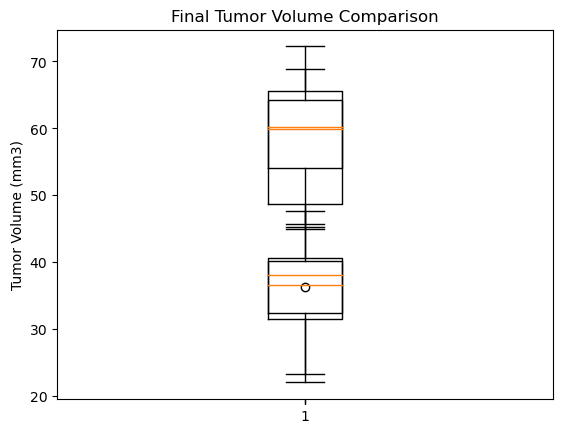

In [141]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Comparison')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticks(np.arange(len(tumor_vol)))
ax1.set_xlabels = ["Campomulin", "Ramicane", "Infubinol", "Ceftamin"]
ax1.boxplot(tumor_vol[0])
ax1.boxplot(tumor_vol[1])
ax1.boxplot(tumor_vol[2])
ax1.boxplot(tumor_vol[3])
plt.show()


## Line and Scatter Plots

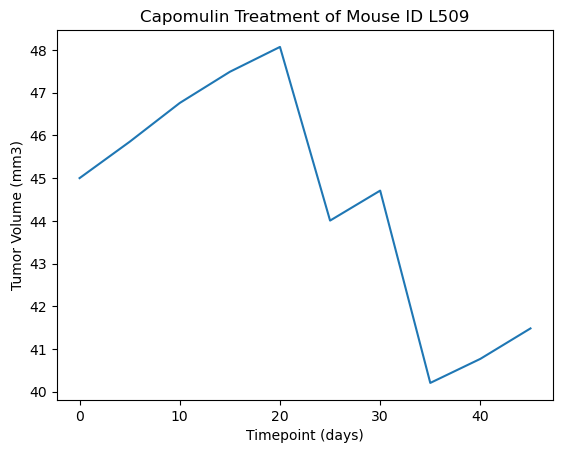

In [144]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# create filtered dataframe showing only Capomulin
cap_data = study_data_df.loc[(study_data_df["Drug Regimen"] == "Capomulin")]

#get a single mouse ID- using I509 to match example
single_mouse = cap_data.loc[(cap_data["Mouse ID"] == "l509")]

#set up line plot and add labels
plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse ID L509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
